# 1. Đây là phần code huấn luyện


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1. Các thư viện chạy phần huấn luyện


In [ ]:
!pip install torch torchvision ultralytics
!pip install paddleocr

In [ ]:
import numpy as np
import pandas as pd
import os
import torch
from ultralytics import YOLO
import zipfile
from IPython.display import Image
from paddleocr import PaddleOCR
import cv2

## 1.2. Kiểm thử phiên bản tài nguyên của colab

In [ ]:
print(f"GPU available: {torch.cuda.is_available()}")
print(f"GPU name: {torch.cuda.get_device_name(0)}")

GPU available: True
GPU name: Tesla T4


# 1.3. Giải nén data dữ liệu và biến của các đường dẫn để tái sử dụng lại

In [ ]:
working_dir = "/content/drive/MyDrive/2025"
file_data_zip = working_dir+"/Data.zip"
path_unzip = working_dir+"/data"
project_data = working_dir+"/data/runs"
os.makedirs(path_unzip, exist_ok=True)

In [ ]:
with zipfile.ZipFile(file_data_zip, 'r') as zip_ref:
    zip_ref.extractall(path_unzip)


print(f"Đã tải và giải nén thành công vào {path_unzip}")

## 1.4. Huấn luyện dữ liệu

In [ ]:
model = YOLO('yolo11n.pt')  # Hoặc yolov11s.pt, yolov11m.pt, yolov11l.pt, yolov11x.pt
file_yaml = "/content/drive/MyDrive/2025/Data/data.yaml"

# Tiến hành training
results = model.train(
    data=file_yaml,
    epochs=25,
    patience=30,
    batch=16,
    imgsz=640,  # Sử dụng GPU
    workers=2,
    project=project_data,
    name='train',
    exist_ok=True
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/2025/Data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspective=0.0, plots=

# 2. Đây là phần lấy model best.pt và phát hiện hình ảnh

In [ ]:
!pip install paddlepaddle
!pip install paddleocr==3.3.1
!pip install ultralytics opencv-python

  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [ ]:
from ultralytics import YOLO
from paddleocr import PaddleOCR
import cv2, os
from google.colab.patches import cv2_imshow

## 2.1. Các đường dẫn quan trọng

In [ ]:
model = YOLO(MODEL_PATH)
ocr = PaddleOCR(lang='en')

/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional t

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/766 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.75M [00:00<?, ?B/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/UVDoc`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/330 [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/735 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.74M [00:00<?, ?B/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

Creating model: ('en_PP-OCRv5_mobile_rec', None)
Using official model (en_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/7.77M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

In [ ]:
def recognize_with_repo(image_path):
    results = ocr.predict(image_path)
    text = ""

    # Nếu kết quả là list các dict (kiểu PaddleX mới)
    if isinstance(results, list) and len(results) > 0 and isinstance(results[0], dict):
        rec_texts = results[0].get("rec_texts", [])
        if rec_texts:
            text = " ".join(rec_texts)
        else:
            text = ""
    else:
        # fallback cho dạng cũ
        for res in results:
            for item in res:
                if isinstance(item, (list, tuple)) and len(item) > 0:
                    if isinstance(item[0], str):
                        text += item[0] + " "
                    elif isinstance(item[0], dict) and "transcription" in item[0]:
                        text += item[0]["transcription"] + " "
    return text.strip()

In [ ]:
def detect_and_show(image_path):
    img = cv2.imread(image_path)
    results = model(image_path)
    print("Ảnh gốc:")
    cv2_imshow(img)

    count = 0
    for box in results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box[:4])
        pad = 5
        x1, y1 = max(0, x1 - pad), max(0, y1 - pad)
        x2, y2 = min(img.shape[1], x2 + pad), min(img.shape[0], y2 + pad)

        crop = img[y1:y2, x1:x2]
        print(f"\nCrop #{count + 1}:")
        cv2_imshow(crop)

        crop_path = f"{OUTPUT_DIR}/crop_{count}.jpg"
        cv2.imwrite(crop_path, crop)

        plate_text = recognize_with_repo(crop_path)
        print("Biển số nhận được:", plate_text, "\n")
        count += 1

## 2.2. Phát hiện biển số


### 2.2.1. Phát hiện 1 hình ảnh

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/2025/data/runs/train/weights/best.pt"   # Đường dẫn YOLO model
OUTPUT_DIR = "/content/drive/MyDrive/2025/output"                            # Nơi lưu crop ảnh
IMAGE_PATH = "/content/drive/MyDrive/2025/25.png"                             # Ảnh cần nhận diện
os.makedirs(OUTPUT_DIR, exist_ok=True)


Bắt đầu nhận diện biển số...

image 1/1 /content/drive/MyDrive/2025/25.png: 448x640 1 License_Plate, 205.1ms
Speed: 10.3ms preprocess, 205.1ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Ảnh gốc:


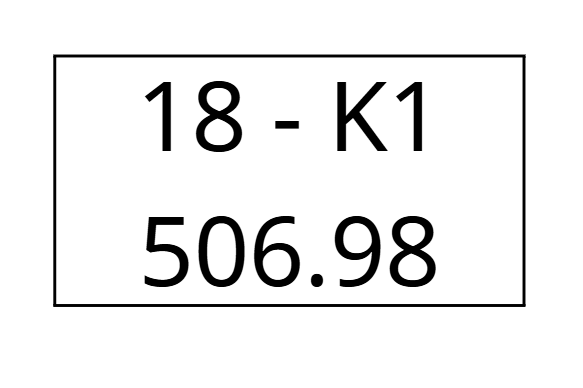


Crop #1:


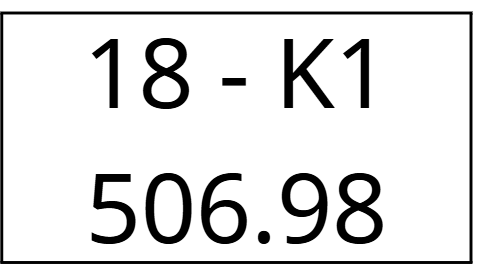

Biển số nhận được: 18 - K1 506.98 


Hoàn thành!


In [ ]:
print("\nBắt đầu nhận diện biển số...")
detect_and_show(IMAGE_PATH)
print("\nHoàn thành!")